In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('dark_background')

In [ ]:
import sys
# Append parent dir to path, so that other modules can be imported.
sys.path.append('../')

In [ ]:
from pi_formula_core import pi_appr, load_roots

In [ ]:
path_to_roots = '../pi_formula_roots.json'
# compute_and_save_roots_upto(num_terms=21, save_path=path_to_roots)
all_roots = load_roots(path_to_roots)

The numerical precision used to compute and store the roots is only good upto 7 terms.
After that the error for certain roots starts getting larger.

In [ ]:
n = 7
z = all_roots[n-1][5]
print('lambda =', z)

appr = pi_appr(z, n)
print('pi_appr =', appr)
print('err =', abs(appr - np.pi))

lambda = (-4.326354993300972-0.169456263790674j)
pi_appr = (2.132619033543051+0.15882017230046586j)
err = 1.021396893024341


In [ ]:
from modules.complex_grid_processor import compute_terms_to_converge_pi
from modules.visualize import plot_convergence_2d_pi

In [ ]:
extent = [-5, 5, -5, 5]  # x_start, x_end, y_start, y_end
terms_to_converge = []
num_terms = 7

*_, (pi_appr_img, terms_to_converge) = tqdm(
    compute_terms_to_converge_pi(extent, num_terms=num_terms, res=512, tol=0.1),
    total=num_terms
)

In [ ]:
from matplotlib.widgets import Slider
from matplotlib.backend_bases import MouseButton

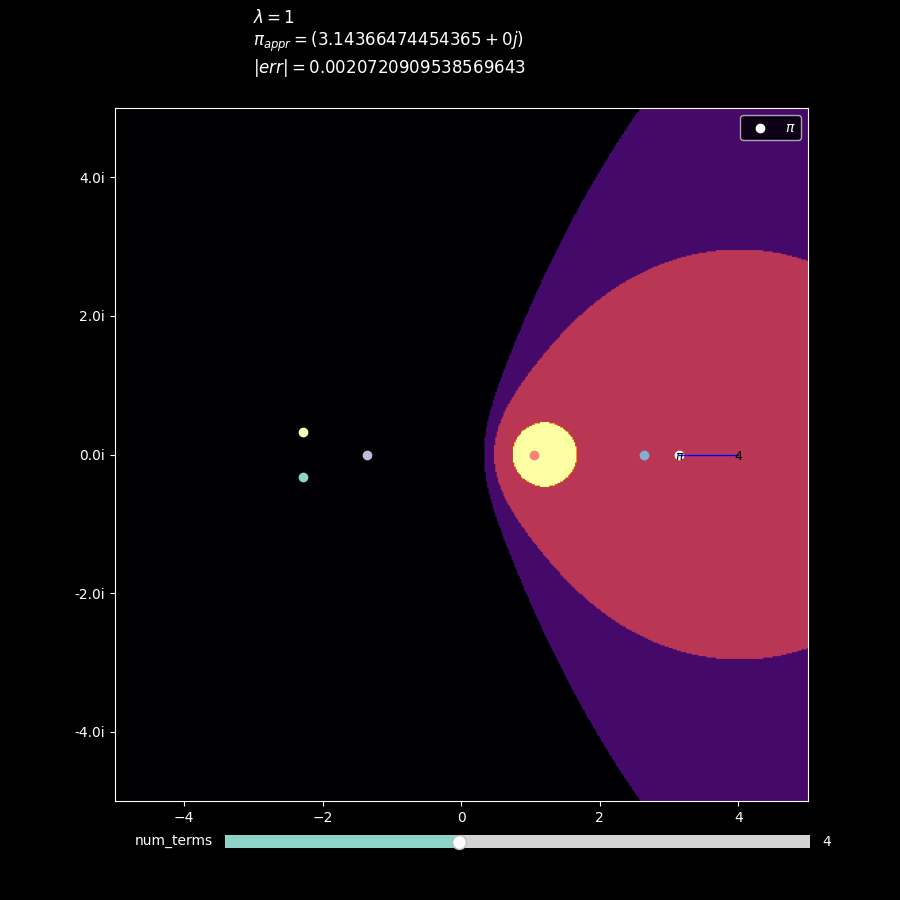

In [ ]:
%matplotlib ipympl

num_terms = 4
min_num_terms = 2
max_num_terms = 7
nearest_root_dist_tol = 0.07

plt.close('all')
fig, ax = plt.subplots(figsize=(9, 9))
pos = 1
path_, = ax.plot([], [], linewidth=1, color="blue")


def snap_to_root(z, roots):
  dists = abs(z - roots)
  nearest_roots_mask = dists < nearest_root_dist_tol
  if nearest_roots_mask.any():
    return roots[dists.argmin()]
  elif abs(z- np.pi) < nearest_root_dist_tol:
    return np.pi
  return z

def update_path(num_terms, path_, title, update_pos=False):
    global pos
    if update_pos:
      pos = snap_to_root(pos, all_roots[num_terms-1])
    points = pi_appr(pos, num_terms=num_terms, cum=True)
    # points = np.insert(points, 0, z)
    x, y = points.real, points.imag
    appr = x[-1]+1j*y[-1]
    path_.set_data(x, y)
    title.set_text(
      rf'$\lambda={pos}$' + '\n' +
      rf'$\pi_{{appr}}={appr}$' + '\n' +
      rf'$|err|={abs(appr-np.pi)}$'
    )


def create_plot(ax, num_terms, pos):
    global path_, title
    ax.clear()
    img = terms_to_converge.copy()
    img[img>num_terms] = num_terms # Set it to max terms so that it appears black.
    plot_convergence_2d(ax, extent, np.log(img), roots=all_roots[num_terms-1])
    ax.scatter(np.pi, 0, c='w', label=r'$\pi$')
    ax.annotate(r'$\pi$', (np.pi, 0), xytext=(-3, -4), textcoords='offset points', fontsize=9, color='k')
    ax.annotate(r'$4$', (4, 0), xytext=(-3, -4), textcoords='offset points', fontsize=9, color='k')
    path_, = ax.plot(*path_.get_data(), linewidth=1, color="blue")
    title = ax.text(0.2, 1.05, '', transform=ax.transAxes, fontsize=12)
    update_path(num_terms, path_, title)
    ax.legend()
    fig.canvas.draw()


def mouse_move(event):
  global pos
  t_ms = time.time()*10 % 10
  if t_ms > 1.5:  # increase to reduce plot update rate
    pos = event.xdata + 1j*event.ydata
    update_path(num_terms, path_, title, update_pos=True)
    fig.canvas.draw()
fig.canvas.mpl_connect('motion_notify_event', mouse_move)


# Define the sliders.
ax_NumTermsSlider = plt.axes([0.25, 0.05, 0.65, 0.03])
NumTermsSlider = Slider(ax_NumTermsSlider, 'num_terms',
                       min_num_terms, max_num_terms, valinit=num_terms, valstep=1)
def update_num_terms(num_terms_updated, event=None):
    global num_terms
    num_terms = int(num_terms_updated)
    create_plot(ax, num_terms, pos)
NumTermsSlider.on_changed(update_num_terms)

# Add mouse click
def on_click(event):
    if event.button is MouseButton.RIGHT and num_terms < max_num_terms:
        update_num_terms(num_terms + 1, event)
        NumTermsSlider.set_val(num_terms)
    elif event.button is MouseButton.LEFT and num_terms > min_num_terms:
        update_num_terms(num_terms - 1, event)
        NumTermsSlider.set_val(num_terms)
fig.canvas.mpl_connect('button_press_event', on_click)


# Initialize.
create_plot(ax, num_terms, pos)
plt.show()

In [ ]:
plt.close('all')